<a href="https://colab.research.google.com/github/hasan2249/DeepLearning/blob/main/knn_gamma_classifition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [137]:
import pandas as pd

cols = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist' ,'class']

df = pd.read_csv('magic04.data', names=cols)
df

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [54]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [55]:
df['class'].unique()

array(['g', 'h'], dtype=object)

In [56]:
df['class'] = (df['class'] == 'g').astype(int)
df['class']

,class
0,1
1,1
2,1
3,1
4,1
...,...
19015,0
19016,0
19017,0
19018,0


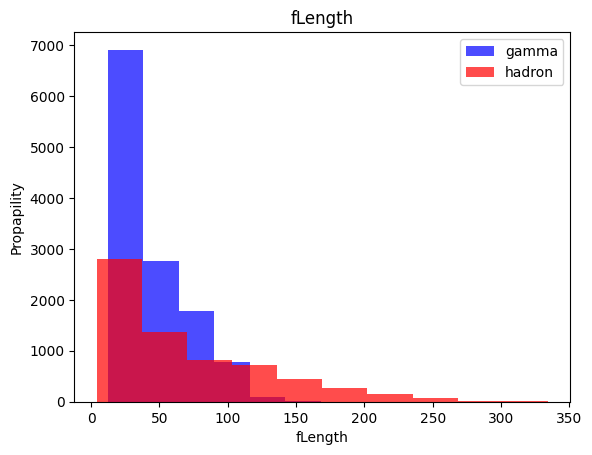

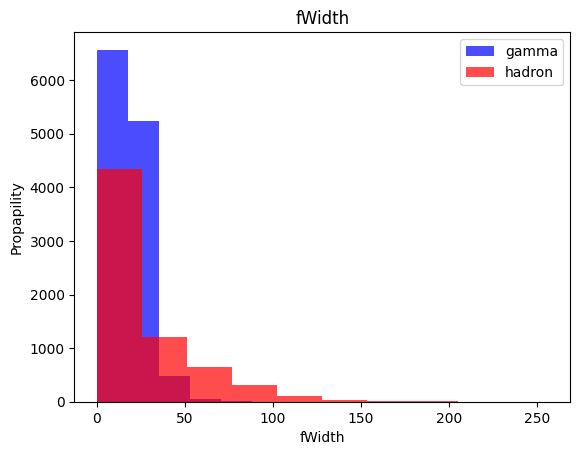

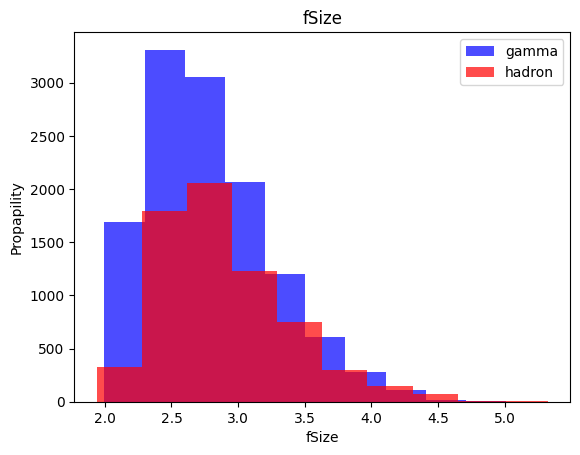

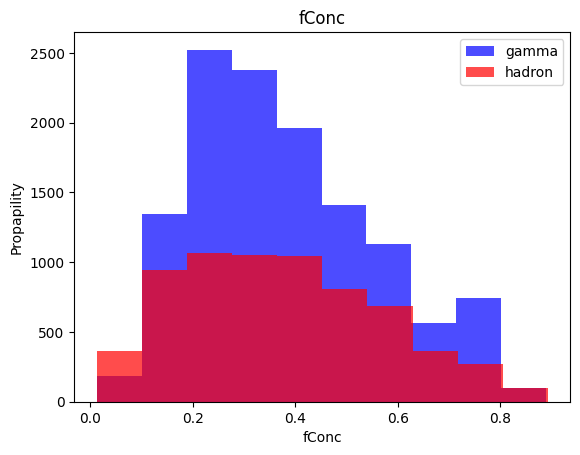

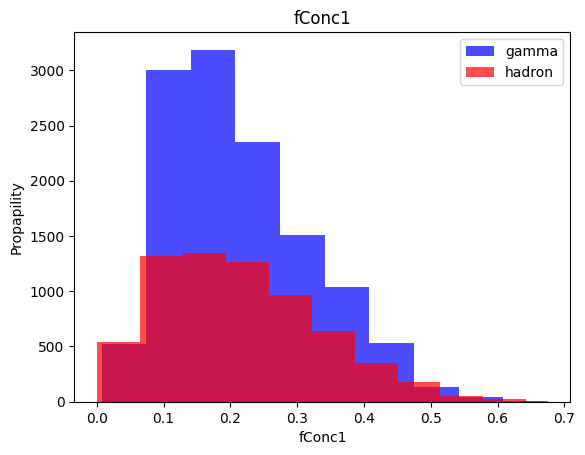

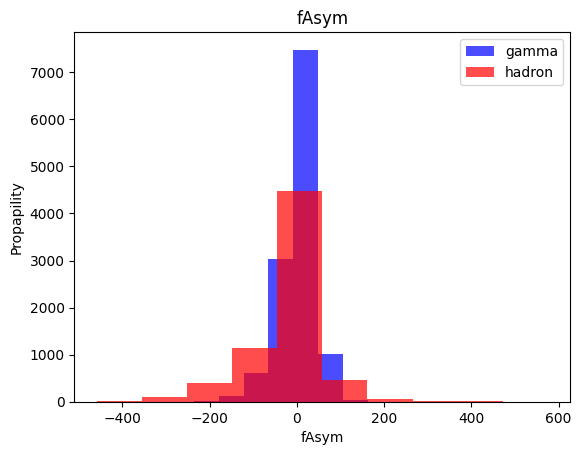

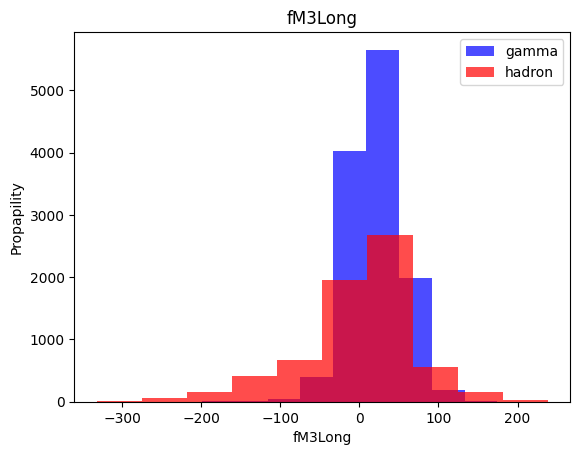

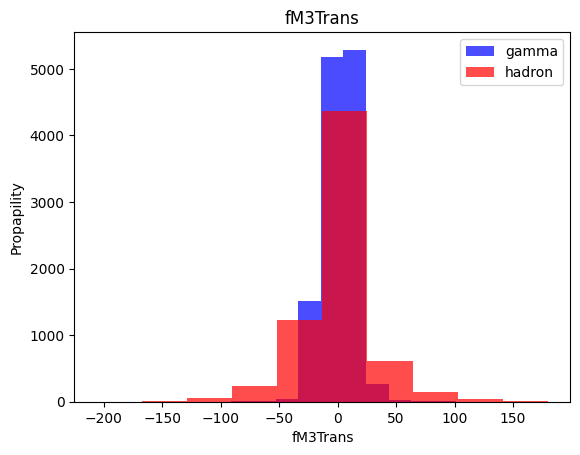

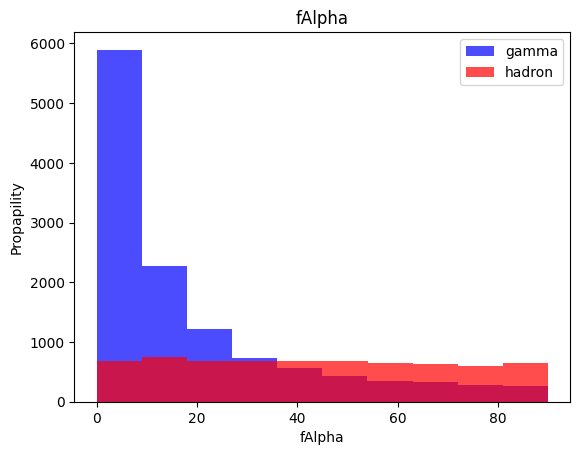

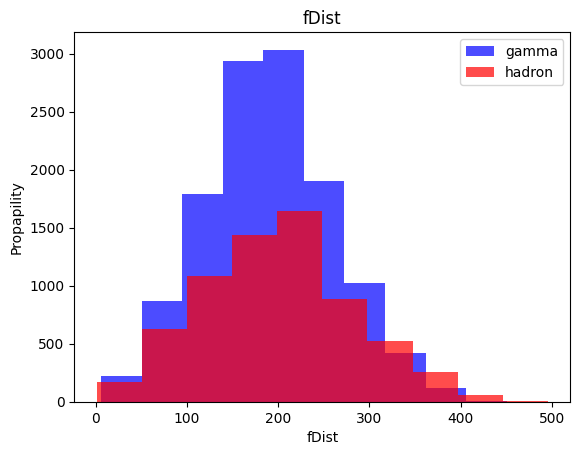

In [57]:
import matplotlib.pyplot as plt

for label in cols[:-1]:
  plt.hist(df[df['class'] == 1][label] ,  color='blue', label="gamma", alpha=0.7 )
  plt.hist(df[df['class'] != 1][label] ,  color='red', label="hadron", alpha=0.7)
  plt.title(label)
  plt.xlabel(label)
  plt.ylabel('Propapility')
  plt.legend()
  plt.show()

**Train , Validate**

In [64]:
import numpy as np

# أخذ عينة عشوائية من البيانات
shuffled_df = df.sample(frac=1, random_state=42)  # frac=1 يعني أخذ كل البيانات بشكل عشوائي

# تقسيم البيانات إلى 60%، 20%، و20%
train_size = int(0.6 * len(shuffled_df))
val_size = int(0.8 * len(shuffled_df))

train_df, val_df, test_df = np.split(shuffled_df, [train_size, val_size])

[        fLength   fWidth   fSize   fConc  fConc1    fAsym   fM3Long  fM3Trans  \
 18749   48.0573  11.0862  2.9571  0.3620  0.1882   0.4200   32.4358   -2.2992   
 7051    23.4858   0.0000  2.2393  0.7378  0.3775  -2.9397   13.0915    0.0001   
 10901   40.5429  19.4073  3.3382  0.2369  0.1269  29.1908   27.0567   -7.1243   
 15858   16.6123   7.8423  2.5572  0.5829  0.3371   6.7271  -10.3448   -2.3240   
 17968  205.4250  37.7936  3.2727  0.2167  0.1257  46.0952 -210.9350  -29.7478   
 ...         ...      ...     ...     ...     ...      ...       ...       ...   
 87      34.8890  19.6402  2.8429  0.3747  0.2534  29.9825   29.1531   12.4846   
 7630    20.3329  17.3059  2.6707  0.4098  0.2231  11.3876   -9.3600   12.8626   
 4163    56.6139  26.1253  3.3259  0.1667  0.0862   0.5887   48.7686  -20.3598   
 3382    59.4502  18.2507  2.6493  0.3991  0.2119  22.6093   62.4000    9.1050   
 10917   17.3028  10.9575  2.3674  0.5966  0.3026  22.3107    9.5094    5.0140   
 
         fAlph

In [109]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

def scale_dataset(dataframe, oversampler=False):
  x = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scalar = StandardScaler()
  x = scalar.fit_transform(x)

  if(oversampler):
    os = RandomOverSampler()
    x, y = os.fit_resample(x, y)

  data = np.hstack((x, np.reshape(y,(-1,1))))

  return data,x,y

train,x_train,y_train  = scale_dataset(train_df, oversampler=True)
val,x_val,y_val  = scale_dataset(val_df, oversampler=False)
test,x_test,y_test  = scale_dataset(test_df, oversampler=False)

In [125]:
len(train) , sum(y_test == 1) , sum(y_test == 0)

(14818, 2473, 1331)

**KNN**

In [107]:
from sklearn.neighbors import KNeighborsClassifier

In [112]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [175]:
y_predict = knn_model.predict(x_test)
p = [x for x, y in enumerate(y_predict) if y == 1]
p

[0,
 2,
 3,
 4,
 7,
 8,
 10,
 11,
 13,
 14,
 15,
 16,
 17,
 20,
 22,
 23,
 24,
 27,
 29,
 30,
 31,
 32,
 35,
 39,
 40,
 41,
 42,
 47,
 48,
 49,
 50,
 51,
 53,
 56,
 57,
 58,
 59,
 60,
 62,
 63,
 64,
 65,
 66,
 70,
 71,
 72,
 73,
 75,
 76,
 78,
 79,
 80,
 82,
 84,
 85,
 87,
 88,
 91,
 92,
 94,
 95,
 96,
 98,
 100,
 101,
 103,
 105,
 106,
 107,
 108,
 110,
 111,
 112,
 114,
 115,
 116,
 119,
 120,
 122,
 124,
 125,
 127,
 128,
 130,
 132,
 133,
 135,
 137,
 138,
 140,
 141,
 143,
 144,
 146,
 147,
 148,
 149,
 151,
 152,
 153,
 155,
 157,
 159,
 160,
 161,
 162,
 163,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 175,
 176,
 177,
 178,
 179,
 180,
 182,
 183,
 185,
 187,
 188,
 189,
 190,
 191,
 192,
 196,
 198,
 199,
 200,
 202,
 203,
 204,
 205,
 207,
 209,
 211,
 213,
 215,
 216,
 221,
 222,
 223,
 226,
 228,
 229,
 230,
 232,
 233,
 234,
 235,
 236,
 237,
 238,
 239,
 240,
 242,
 244,
 246,
 248,
 249,
 251,
 252,
 253,
 254,
 258,
 259,
 265,
 269,
 270,
 272,
 273,
 274,
 276,
 

In [126]:
(np.equal(y_predict,y_test).sum() / len(y_test)) * 100

81.01997896950579

In [133]:
from sklearn.metrics import classification_report

In [135]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.76      0.68      0.71      1331
           1       0.84      0.88      0.86      2473

    accuracy                           0.81      3804
   macro avg       0.80      0.78      0.79      3804
weighted avg       0.81      0.81      0.81      3804

